In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras


2025-02-05 15:58:44.743677: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 15:58:44.806405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-05 15:58:44.817887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-05 15:58:44.822007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 15:58:44.889082: I tensorflow/core/platform/cpu_feature_guar

In [2]:
DATADIR = './' #base directory
CATEGORIES = ['cell_images/Parasitized', 'cell_images/Uninfected'] #labels

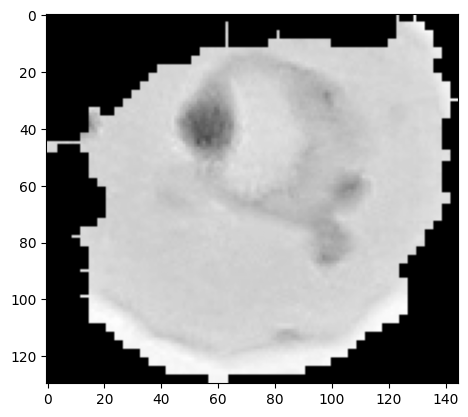

In [3]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # constructing the path to potato disease
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap= 'gray')
    break
  break

In [4]:
img_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
img_array.shape

(130, 145)

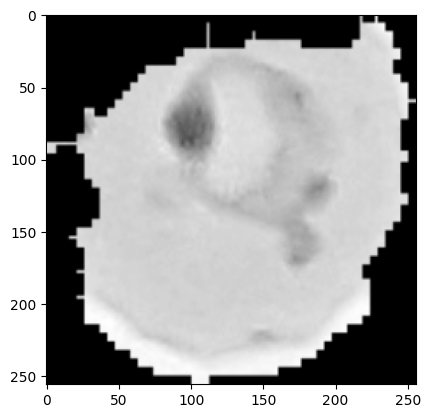

In [6]:
IMG_SIZE = 256 #resize all images
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')

In [7]:
#CREATING TRAINING DATA
training_data = []

def create_training_data():
 for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # constructing the path to potato disease
  class_num = CATEGORIES.index(category)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append([new_array, class_num])
    except Exception as e:
      pass

create_training_data()

In [8]:
len(training_data)

27558

In [9]:
import random
random.shuffle(training_data)

In [10]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

type(X), type(y)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y= np.array(y)

In [11]:
X = X/255
X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [12]:
#BUILDING CNN MODEL


model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size = (3,3), input_shape = X.shape[1:], activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    # keras.layers.Dropout(0.2, seed = 42),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.GlobalAveragePooling2D(), #Global Average Pooling

    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

hist = model.fit(X, y, batch_size=64, epochs=30, validation_split=0.1)



/home/tiago/anaconda3/envs/detec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1738781942.613484  355436 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738781942.768672  355436 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738781942.769112  35

Epoch 1/30


I0000 00:00:1738781949.684327  355498 service.cc:146] XLA service 0x7fec54016770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738781949.684370  355498 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A4500, Compute Capability 8.6
2025-02-05 15:59:09.715810: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-05 15:59:09.799852: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90300


  2/388 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.4648 - loss: 0.6963

I0000 00:00:1738781955.249152  355498 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


388/388 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.5285 - loss: 0.6888 - val_accuracy: 0.5468 - val_loss: 0.6847
Epoch 2/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.6015 - loss: 0.6649 - val_accuracy: 0.5588 - val_loss: 0.6968
Epoch 3/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.6079 - loss: 0.6606 - val_accuracy: 0.6052 - val_loss: 0.6553
Epoch 4/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.6217 - loss: 0.6502 - val_accuracy: 0.5867 - val_loss: 0.6740
Epoch 5/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.6256 - loss: 0.6450 - val_accuracy: 0.6172 - val_loss: 0.6544
Epoch 6/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.6285 - loss: 0.6452 - val_accuracy: 0.6212 - val_loss: 0.6530
Epoch 7/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.6313 - loss: 0.6421 - val_accuracy: 0.6092 - val_loss: 0.6504
Epoch 8/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.6300 - loss: 0.6421 - val_accurac

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

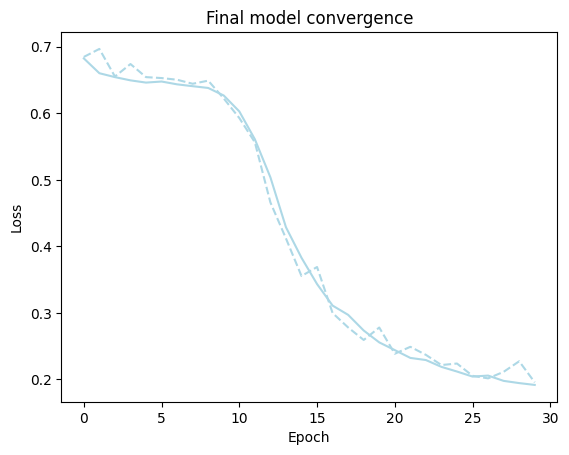

In [16]:
plt.plot(hist.epoch, hist.history["loss"],      label = f"Training",    color = "lightblue")
plt.plot(hist.epoch, hist.history["val_loss"], label = f"Test", linestyle = "dashed", color = "lightblue")
plt.title("Final model convergence")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [ ]:
pd.Series(y).value_counts()